<a href="https://colab.research.google.com/github/mrsety/NAEX/blob/main/KysilkaNaex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Úvod

Provedl jsem experiment *měření času ohřevu vody* s parametry velikosti hrnce, velikosti plotny, soli, a množství vody. Protože má tento navržený model 5 parametrů, bylo-by zapotřebí udělat 32 experimentů. To je ovšem veliké množství vzhledem k času stráveného samotným experimentem a množstvím utracené energie. Zvolil jsem tedy design modelu $2^{5-1}$.

## Faktory experimentu



* Teplota vody byla měřena kuchyňským ručičkovým teploměrem.
* Teplota vody měla před exprimentem 10°C a cílová teplota vody 80°C.
* Objem hrnce: 2/4 litry (-1,1)
* Průměr plotny elektrického vařiče: 14,5/21cm (-1,1)
* Sůl: 0/15g (-1,1)
* Poklička: (-1,1)
* Množství vody: 0,5/1l (-1,1)

Poznámka: Čas uveden v sekundách. Plotna byla puštěná na maximum a hrnce se před experimentem ochladili ve vodě. Pořadí experimentů bylo náhodné.

Zvolený generátor je:
  - $voda = hrnec*plotna*sul*poklicka$



In [2]:
cat(system('sudo apt-get install -y gmp', intern=TRUE), sep = "\n")
cat(system('sudo apt-get install -y partitions', intern=TRUE), sep = "\n")
cat(system('sudo apt-get install -y DoE.base', intern=TRUE), sep = "\n")

list_of_packages <- c("tidyverse","MASS", "lattice", "FrF2","gridExtra") # "agricolae","nortest","lattice","pwr",
missing_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
missing_packages
if(length(missing_packages)) install.packages(missing_packages)
lapply(list_of_packages, library, character.only = TRUE)

Warning message in system("sudo apt-get install -y gmp", intern = TRUE):
“running command 'sudo apt-get install -y gmp' had status 100”


Reading package lists...
Building dependency tree...
Reading state information...


Warning message in system("sudo apt-get install -y partitions", intern = TRUE):
“running command 'sudo apt-get install -y partitions' had status 100”


Reading package lists...
Building dependency tree...
Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  r-cran-combinat r-cran-conf.design r-cran-gmp r-cran-lmtest r-cran-mathjaxr
  r-cran-numbers r-cran-partitions r-cran-polynom r-cran-sets r-cran-vcd
  r-cran-zoo
The following NEW packages will be installed:
  r-cran-combinat r-cran-conf.design r-cran-doe.base r-cran-gmp r-cran-lmtest
  r-cran-mathjaxr r-cran-numbers r-cran-partitions r-cran-polynom r-cran-sets
  r-cran-vcd r-cran-zoo
0 upgraded, 12 newly installed, 0 to remove and 19 not upgraded.
Need to get 7,326 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal/main amd64 r-cran-combinat all 0.0-8-6.1~ubuntu20.04.1~ppa1 [42.8 kB]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal/main amd64 r-cran-conf.de

[1] "FrF2"      "gridExtra"

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sfsmisc’, ‘scatterplot3d’, ‘igraph’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: DoE.base

Loading required package: grid

Loading required package: conf.design

Registered S3 method overwritten by 'DoE.base':
  method           from       
  factorize.factor conf.design


Attaching package: ‘DoE.base’


The follo

[[1]]
 [1] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
 [7] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[13] "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "MASS"      "forcats"   "stringr"   "dplyr"     "purrr"     "readr"    
 [7] "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics" 
[13] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "lattice"   "MASS"      "forcats"   "stringr"   "dplyr"     "purrr"    
 [7] "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"    
[13] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "FrF2"        "DoE.base"    "conf.design" "grid"        "lattice"    
 [6] "MASS"        "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "ggplot2"     "tidyverse"  
[16] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[21] "methods"     "base"       

[[5]]
 [1] "gridExtra"   "FrF2"        "DoE.base"    "conf.design" "grid"       
 [6] "lattice"     "MASS"        "forcats"     "stringr"     "dplyr"      
[11] "purrr"       "readr"       "tidyr"       "tibble"      "ggplot2"    
[16] "tidyverse"   "stats"       "graphics"    "grDevices"   "utils"      
[21] "datasets"    "methods"     "base"

In [3]:
data <- read.csv("data.csv")
head(data)

,hrnec,plotna,sul,poklicka,voda,cas
,<int>,<int>,<int>,<int>,<int>,<int>
1,-1,1,-1,-1,-1,185
2,-1,-1,-1,1,-1,235
3,-1,-1,-1,-1,1,498
4,-1,1,1,1,-1,170
5,-1,1,1,-1,1,255
6,1,1,1,1,1,205


In [4]:
data <- data %>% mutate(hrnec = as.factor(hrnec), 
                  plotna = as.factor(plotna), 
                  sul = as.factor(sul),
                  poklicka = as.factor(poklicka),
                  voda = as.factor(voda),
                  cas = cas)

In [5]:
design =FrF2(2^(5-1), 5, replications = 1, randomize = FALSE,
generators=c("ABCD"), 
factor.names = c("hrnec", "plotna",
                 "sul", "poklicka", "voda"))

In [6]:
design$hrnec = data$hrnec
design$plotna = data$plotna
design$sul = data$sul
design$poklicka = data$poklicka
design$voda = data$voda
cas = data$cas
design = add.response(design, cas)

# Design našeho experimentu

In [7]:
summary(design)

Call:
FrF2(2^(5 - 1), 5, replications = 1, randomize = FALSE, generators = c("ABCD"), 
    factor.names = c("hrnec", "plotna", "sul", "poklicka", "voda"))

Experimental design of type  FrF2.generators 
16  runs

Factor settings (scale ends):
  hrnec plotna sul poklicka voda
1    -1     -1  -1       -1   -1
2     1      1   1        1    1

Responses:
[1] cas

Design generating information:
$legend
[1] A=hrnec    B=plotna   C=sul      D=poklicka E=voda    

$generators
[1] E=ABCD


Alias structure:
[[1]]
[1] no aliasing among main effects and 2fis


The design itself:
   hrnec plotna sul poklicka voda cas
1     -1      1  -1       -1   -1 185
2     -1     -1  -1        1   -1 235
3     -1     -1  -1       -1    1 498
4     -1      1   1        1   -1 170
5     -1      1   1       -1    1 255
6      1      1   1        1    1 205
7      1     -1  -1        1    1 510
8     -1     -1   1       -1   -1 285
9      1     -1  -1       -1   -1 290
10     1     -1   1       -1    1 485
11     1

In [8]:
summary(as.data.frame(design))

 hrnec  plotna sul    poklicka voda        cas       
 -1:8   -1:8   -1:8   -1:8     -1:8   Min.   :130.0  
 1 :8   1 :8   1 :8   1 :8     1 :8   1st Qu.:200.0  
                                      Median :245.0  
                                      Mean   :290.8  
                                      3rd Qu.:357.5  
                                      Max.   :510.0  

# Boxploty pro jednotlivé faktory

Warning message:
“Removed 2 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_segment()`).”


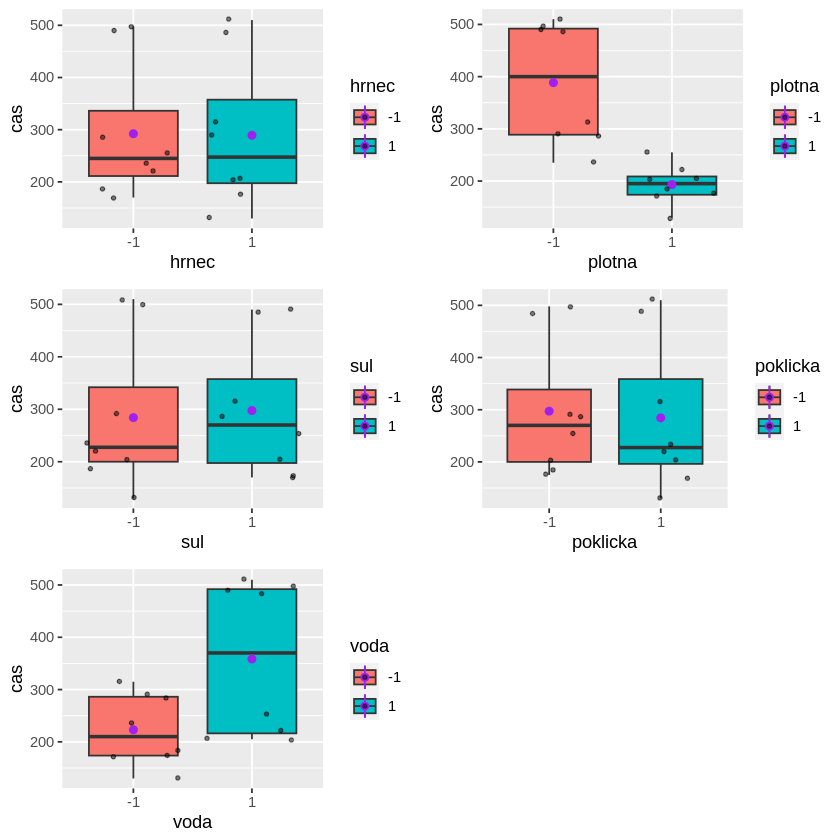

In [41]:
box_plot1 <- ggplot(data , aes(x = hrnec, y = cas, fill=hrnec)) +
             geom_boxplot() + 
             stat_summary(fun="mean", size=0.3, color='purple') + 
             geom_jitter(color="black", size=0.9, alpha=0.5)


box_plot2 <- ggplot(data , aes(x = plotna, y = cas, fill=plotna)) +
             geom_boxplot() + 
             stat_summary(fun.y="mean", size=0.3, color='purple') + 
             geom_jitter(color="black", size=0.9, alpha=0.5)

box_plot3 <- ggplot(data , aes(x = sul, y = cas, fill=sul)) +
             geom_boxplot() + 
             stat_summary(fun="mean", size=0.3, color='purple') + 
             geom_jitter(color="black", size=0.9, alpha=0.5)

box_plot4 <- ggplot(data, aes(x = poklicka, y = cas, fill=poklicka)) +
             geom_boxplot() + 
             stat_summary(fun="mean", size=0.3, color='purple') + 
             geom_jitter(color="black", size=0.9, alpha=0.5)

box_plot5 <- ggplot(data, aes(x = voda, y = cas, fill=voda)) +
             geom_boxplot() + 
             stat_summary(fun="mean", size=0.3, color='purple') + 
             geom_jitter(color="black", size=0.9, alpha=0.5)



grid.arrange(box_plot1, box_plot2, box_plot3, box_plot4, box_plot5)

Z boxplotů můžeme vyčíst, že zásadní efekt na rychlost ohřevu vody má velikost plotny a množství vody. U ostatních faktorů zatím nemůžeme potvrdit ani vyvrátit signifikanci.

# Main effects plot

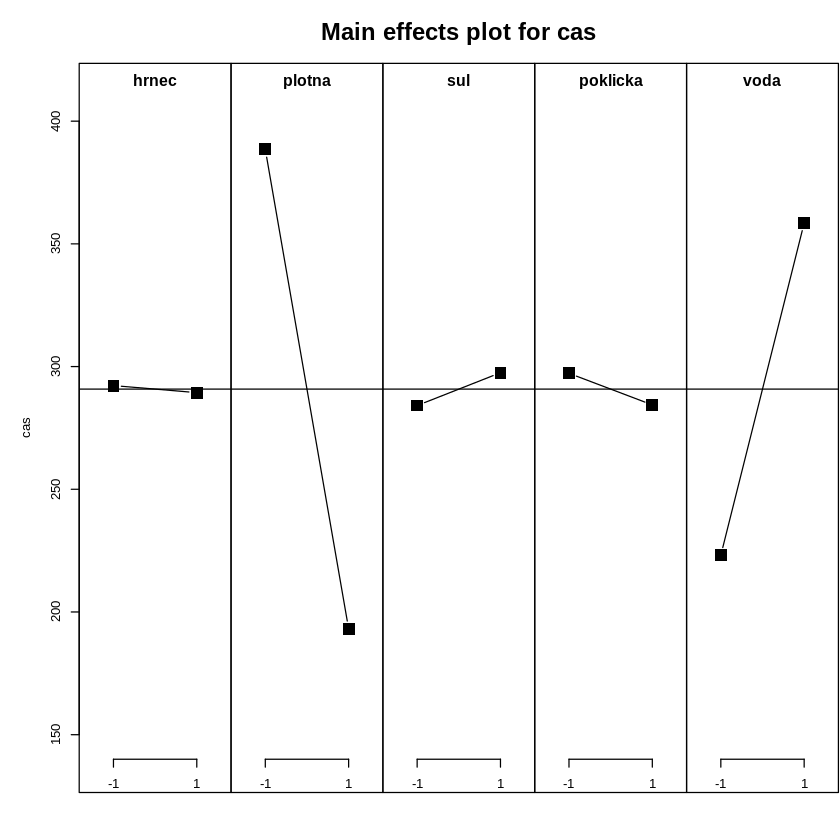

In [10]:
MEPlot(design)

Největší efekt na ohřev vody má velikost ploty a množství vody. U soli vidíme negativní efekt na rychlost ohřevu, sůl tedy zpomaluje ohřívání. Přítomnost pokličky má narozdíl od ostatních faktorů pozitivní vliv na čas ohřevu vody.

# Interaction plot

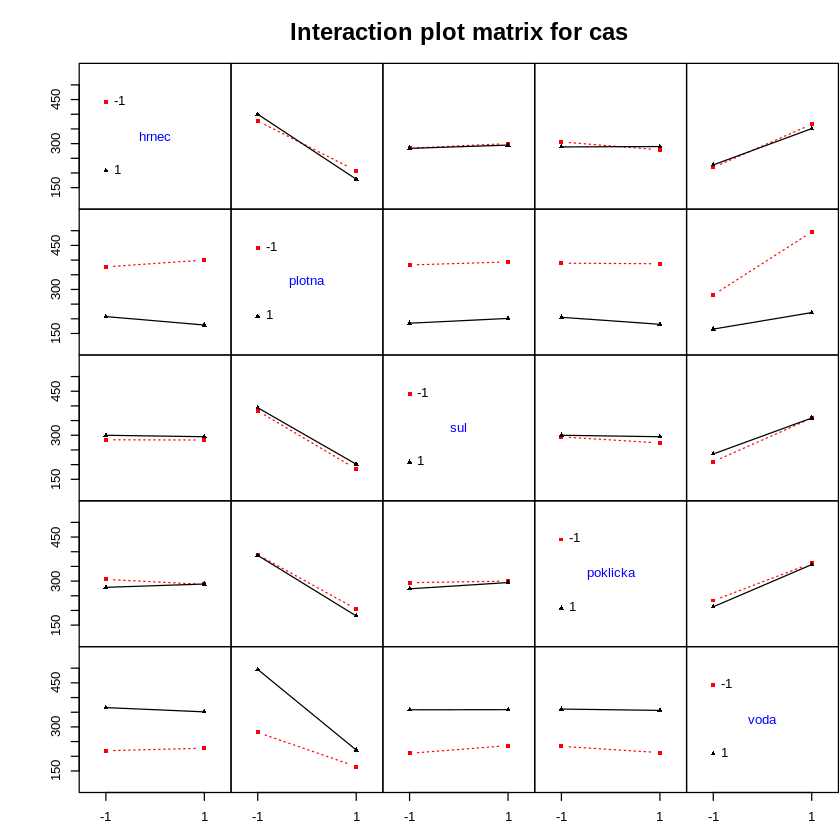

In [11]:
IAPlot(design)
#interaction.plot(design$hrnec,design$plotna,design$cas,type="b",pch=19, fixed=T,xlab="hrnec",ylab="čas")

Z interakčního plotu můžeme usoudit, že všechny faktory jsou mezi sebou nezávislé. Pouze u faktorů vody a plotny vidíme rozdíl v čase.

# Významnost faktorů

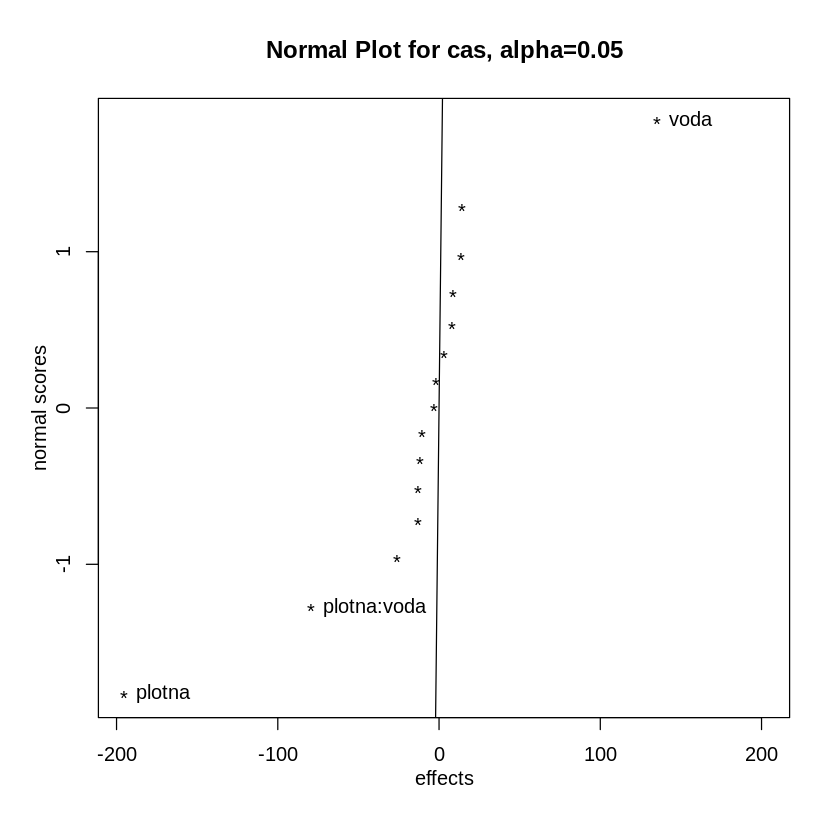

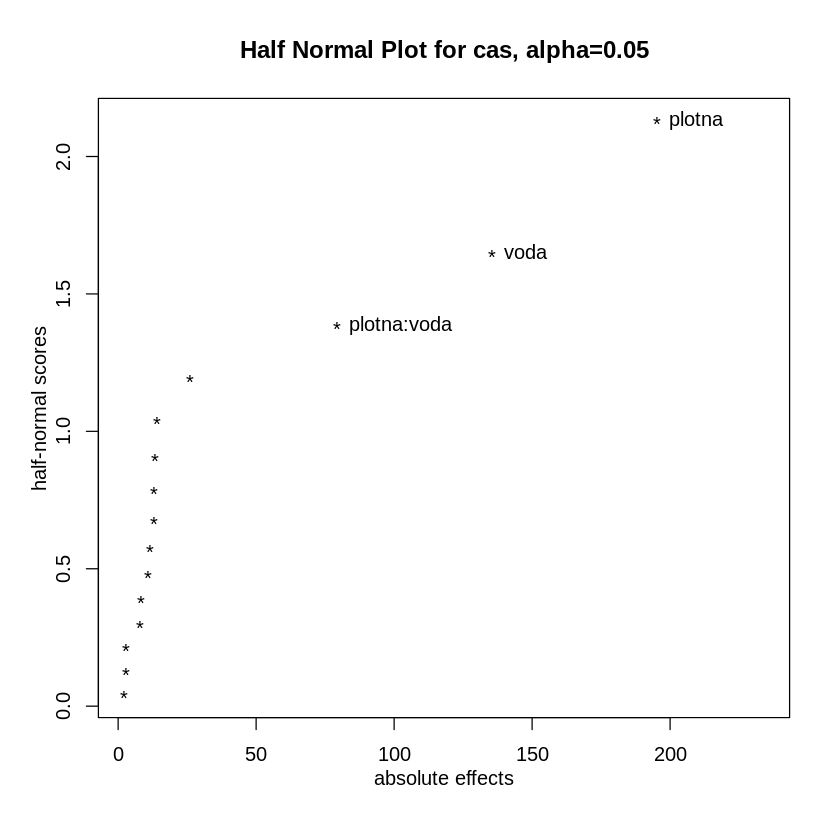

In [12]:
#qqplot(DanielPlot(design,alpha=0.1)$x,DanielPlot(design)$y)
qqline(DanielPlot(design,alpha=0.05)$y)
DanielPlot(design,alpha=0.05,half=TRUE)

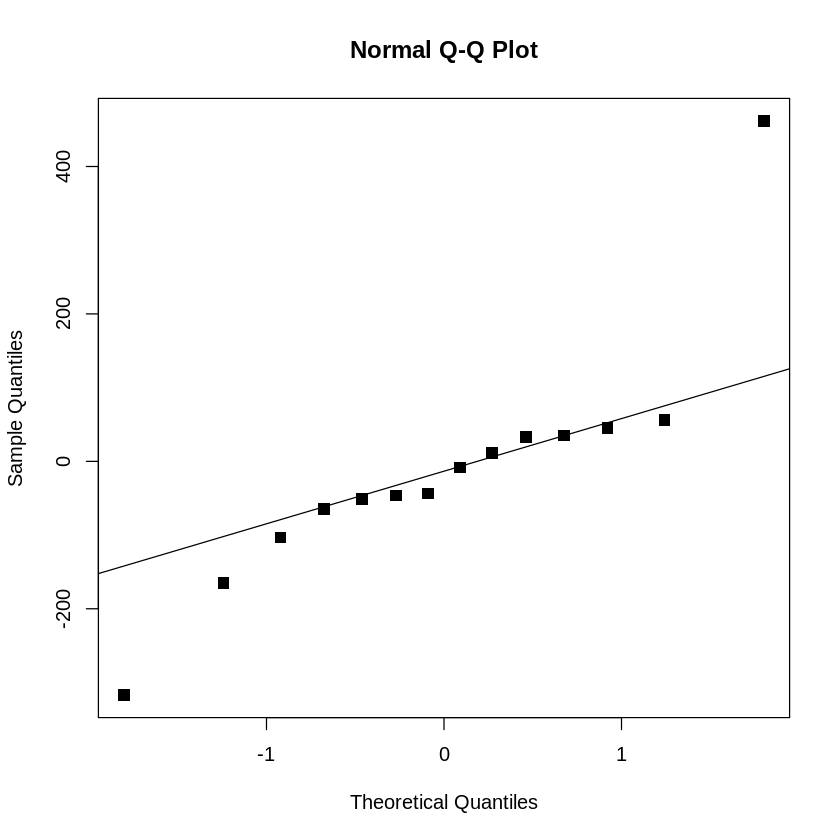

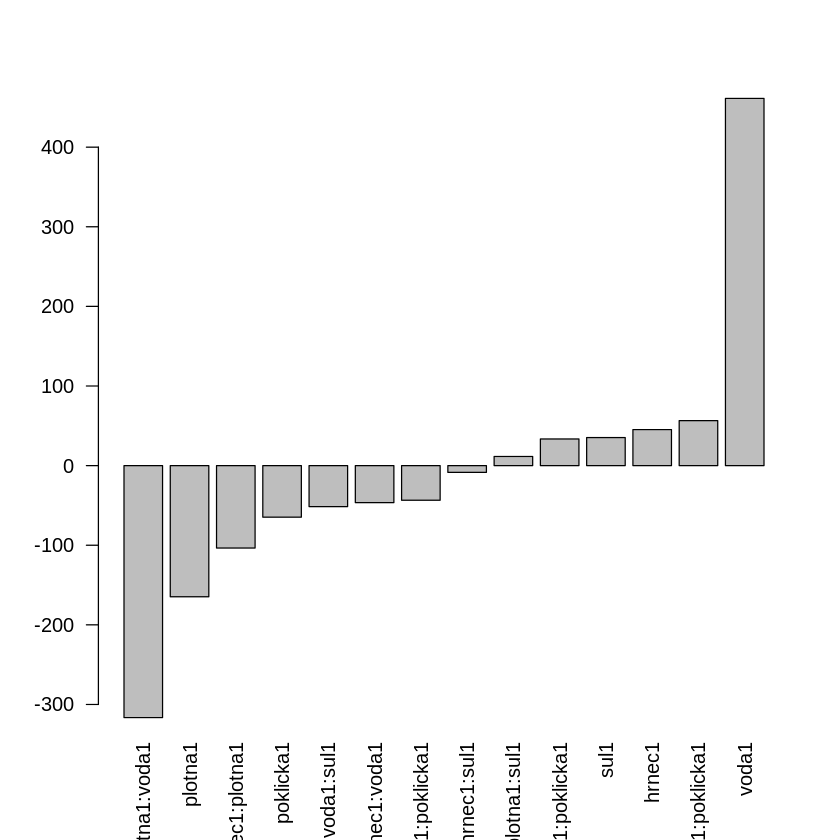

In [13]:
modelfull = aov(cas~hrnec*plotna*voda*poklicka*sul, data = design)
qqnorm(2*modelfull$coeff[2:15], cex=1.3, pch=15)
qqline(2*modelfull$coeff[2:15], cex=1.3, pch=15)
barplot(sort(2*modelfull$coeff[2:15]), las=2, pch = 15)

# ANOVA

Podle Danielplotu, barplotu a interakčního plotu můžeme usoudit, že do modelu můžeme zahrnout faktory voda, plotna a hrnec. Pro začátek vytvoříme lineární model, abychom zjistili, kolik variability náš model vysvětluje.

In [16]:
summary(lm(cas~hrnec*plotna*voda , data = design))


Call:
lm.default(formula = cas ~ hrnec * plotna * voda, data = design)

Residuals:
   Min     1Q Median     3Q    Max 
 -25.0  -12.5    0.0   12.5   25.0 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            260.00      15.09  17.227 1.31e-07 ***
hrnec1                  42.50      21.34   1.991 0.081621 .  
plotna1                -82.50      21.34  -3.865 0.004773 ** 
voda1                  234.00      21.34  10.963 4.25e-06 ***
hrnec1:plotna1         -67.50      30.18  -2.236 0.055753 .  
hrnec1:voda1           -39.00      30.18  -1.292 0.232415    
plotna1:voda1         -174.00      30.18  -5.764 0.000422 ***
hrnec1:plotna1:voda1    31.50      42.69   0.738 0.481648    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.34 on 8 degrees of freedom
Multiple R-squared:  0.9859,	Adjusted R-squared:  0.9735 
F-statistic: 79.82 on 7 and 8 DF,  p-value: 9.055e-07


Koeficient determinace nabývá hodnoty 0.97.

In [17]:
model1 <- aov(cas~hrnec*plotna*voda, data = design)
summary(model1)

                  Df Sum Sq Mean Sq F value   Pr(>F)    
hrnec              1     33      33   0.073   0.7944    
plotna             1 152686  152686 335.158 8.15e-08 ***
voda               1  73306   73306 160.912 1.40e-06 ***
hrnec:plotna       1   2678    2678   5.879   0.0416 *  
hrnec:voda         1    541     541   1.187   0.3077    
plotna:voda        1  25043   25043  54.972 7.52e-05 ***
hrnec:plotna:voda  1    248     248   0.545   0.4816    
Residuals          8   3644     456                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Vidíme, že hrnec není významný, interakce hrnce a vody není významná, taktéž interakce hrnce, plotny a vody.

In [18]:
model2 <- aov(cas~plotna*voda*hrnec - hrnec - hrnec:voda - hrnec:plotna:voda, data = design)
summary(model2)

             Df Sum Sq Mean Sq F value   Pr(>F)    
plotna        1 152686  152686 344.420 4.45e-09 ***
voda          1  73306   73306 165.359 1.52e-07 ***
plotna:voda   1  25043   25043  56.491 2.03e-05 ***
plotna:hrnec  2   2711    1356   3.058    0.092 .  
Residuals    10   4433     443                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Toto je náš výsledný model.

## Efekty jednotlivých faktorů


In [19]:
effects <-as.data.frame(model2$coefficients)
names(effects)[1] <- 'Koeficienty'
effects

,Koeficienty
,<dbl>
(Intercept),269.750
plotna1,-90.375
voda1,214.500
plotna1:voda1,-158.250
plotna-1:hrnec1,23.000
plotna1:hrnec1,-28.750


# Ověření linearity jednotlivých parametrů

In [20]:
data_center <- read.csv("datadodatek.csv")
data_center = data_center[1:2,1:6]
data_center$hrnec = 0
data_center$plotna = 0
data_center$sul = 0
data_center$voda = 0
data_center = data_center %>% mutate(hrnec = as.factor(hrnec), 
                  plotna = as.factor(plotna), 
                  sul = as.factor(sul),
                  poklicka = as.factor(poklicka),
                  voda = as.factor(voda),
                  cas=cas)

#datanum = read.csv("data.csv")

data_with_center = rbind(data, data_center)

isCenter = c(rep(0,times=16),rep(1,times=2))
data_with_center$isCenter = isCenter

In [22]:
model_center1 = aov(cas~ isCenter + plotna*voda*hrnec - hrnec - hrnec:voda - hrnec:plotna:voda, data=data_with_center)
summary(model_center1)

             Df Sum Sq Mean Sq F value   Pr(>F)    
isCenter      1   9950    9950  24.512 0.000435 ***
plotna        1 152686  152686 376.147 7.43e-10 ***
voda          1  73306   73306 180.591 3.60e-08 ***
plotna:voda   1  25043   25043  61.695 7.77e-06 ***
plotna:hrnec  2   2711    1356   3.339 0.073561 .  
Residuals    11   4465     406                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Vidíme, že centrované hodnoty jsou v modelu významné, to značí nelineární závislost vysvětlujících proměnných. Správnou závislost se pokusíme nalézt pomocí lineárního modelu.

# Regresní model s reálnými hodnotami parametrů

In [23]:
datanum = read.csv("data.csv")

datanum$hrnec[datanum$hrnec == -1] = 2
datanum$hrnec[datanum$hrnec == 1] = 4
datanum$plotna[datanum$plotna == -1] = 14
datanum$plotna[datanum$plotna == 1] = 21
datanum$sul[datanum$sul == -1] = 0
datanum$sul[datanum$sul == 1] = 15
datanum$poklicka = as.factor(datanum$poklicka)
datanum$voda[datanum$voda == -1] = 0.5
datanum$voda[datanum$voda == -1] = 1

data_center <- read.csv("datadodatek.csv")
data_center = data_center[1:2,1:6]
data_center$poklicka = as.factor(data_center$poklicka)

datanum_with_center = rbind(datanum, data_center)

In [24]:
modelnumfull = lm(cas ~ (.)^2,data = datanum_with_center)
summary(modelnumfull)


Call:
lm.default(formula = cas ~ (.)^2, data = datanum_with_center)

Residuals:
         1          2          3          4          5          6          7 
-1.243e-14  5.477e+00  7.507e-16  7.303e+00 -5.689e-15  7.303e+00  5.477e+00 
         8          9         10         11         12         13         14 
 2.340e-14  1.103e-14 -6.734e-15  3.258e-15  5.477e+00 -8.066e-15  5.477e+00 
        15         16         17         18 
 7.303e+00  7.303e+00 -1.299e-15 -5.112e+01 

Coefficients: (4 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)      -264.37500  349.70468  -0.756    0.588
hrnec              74.68750   82.55023   0.905    0.532
plotna             18.23214   17.76884   1.026    0.492
sul                 2.40833   12.13843   0.198    0.875
poklicka1         -35.70079  182.06725  -0.196    0.877
poklicka0         -64.07143   57.64286  -1.112    0.466
voda             1140.75000  330.20091   3.455    0.179
hrnec:plotna 

In [25]:
modelnum1 = lm(cas~ plotna*voda*hrnec - hrnec - hrnec:voda - hrnec:plotna:voda, data = datanum_with_center)
summary(modelnum1)


Call:
lm.default(formula = cas ~ plotna * voda * hrnec - hrnec - hrnec:voda - 
    hrnec:plotna:voda, data = datanum_with_center)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.973  -3.895   3.376  21.173  42.629 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -19.1776   129.8836  -0.148 0.884883    
plotna          6.3881     7.4020   0.863 0.403767    
voda         1062.0000   164.2941   6.464 2.12e-05 ***
plotna:voda   -45.2143     9.2059  -4.911 0.000284 ***
plotna:hrnec   -0.2212     0.4514  -0.490 0.632317    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.22 on 13 degrees of freedom
Multiple R-squared:  0.9497,	Adjusted R-squared:  0.9342 
F-statistic: 61.32 on 4 and 13 DF,  p-value: 2.615e-08


In [26]:
anova(modelnumfull,modelnum1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2946.828,NA,NA,NA,NA
2,13,13496.277,-12,-10549.45,0.2983278,0.9079467


In [27]:
modelnum2 = lm(cas~ -1 + plotna*voda, data = datanum_with_center)
summary(modelnum2)


Call:
lm.default(formula = cas ~ -1 + plotna * voda, data = datanum_with_center)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.992  -9.127   6.819  17.643  40.873 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
plotna         4.671      1.334    3.50  0.00322 ** 
voda        1038.986     48.844   21.27 1.29e-12 ***
plotna:voda  -43.950      3.176  -13.84 6.01e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.3 on 15 degrees of freedom
Multiple R-squared:  0.9919,	Adjusted R-squared:  0.9903 
F-statistic: 614.1 on 3 and 15 DF,  p-value: 6.509e-16


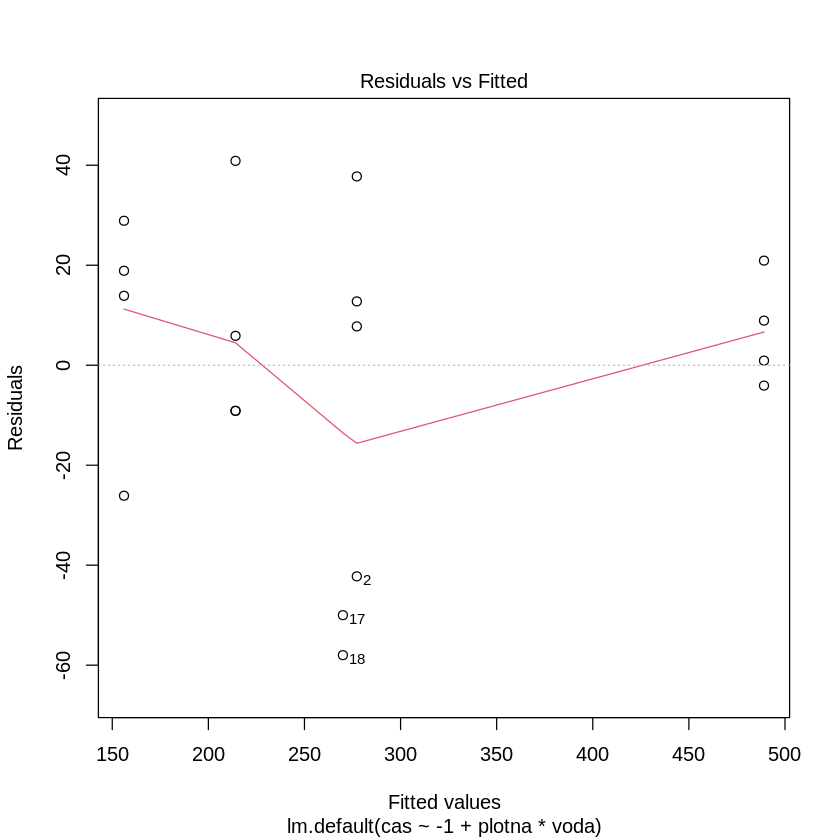

In [28]:
plot(modelnum2,which=1)

In [43]:
modelnum3 = lm(log(cas) ~ -1 +I(plotna^2)+I(voda^2)+plotna+voda+plotna:voda, data = datanum_with_center)
summary(modelnum3)


Call:
lm.default(formula = log(cas) ~ -1 + I(plotna^2) + I(voda^2) + 
    plotna + voda + plotna:voda, data = datanum_with_center)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22958 -0.02094  0.01162  0.03807  0.14604 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
I(plotna^2)  -0.034667   0.003987  -8.695 8.88e-07 ***
I(voda^2)     9.212027   1.989828   4.630 0.000472 ***
plotna        1.175866   0.128154   9.175 4.84e-07 ***
voda        -11.576921   3.144594  -3.682 0.002766 ** 
plotna:voda  -0.078329   0.031094  -2.519 0.025647 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1088 on 13 degrees of freedom
Multiple R-squared:  0.9997,	Adjusted R-squared:  0.9996 
F-statistic:  9442 on 5 and 13 DF,  p-value: < 2.2e-16


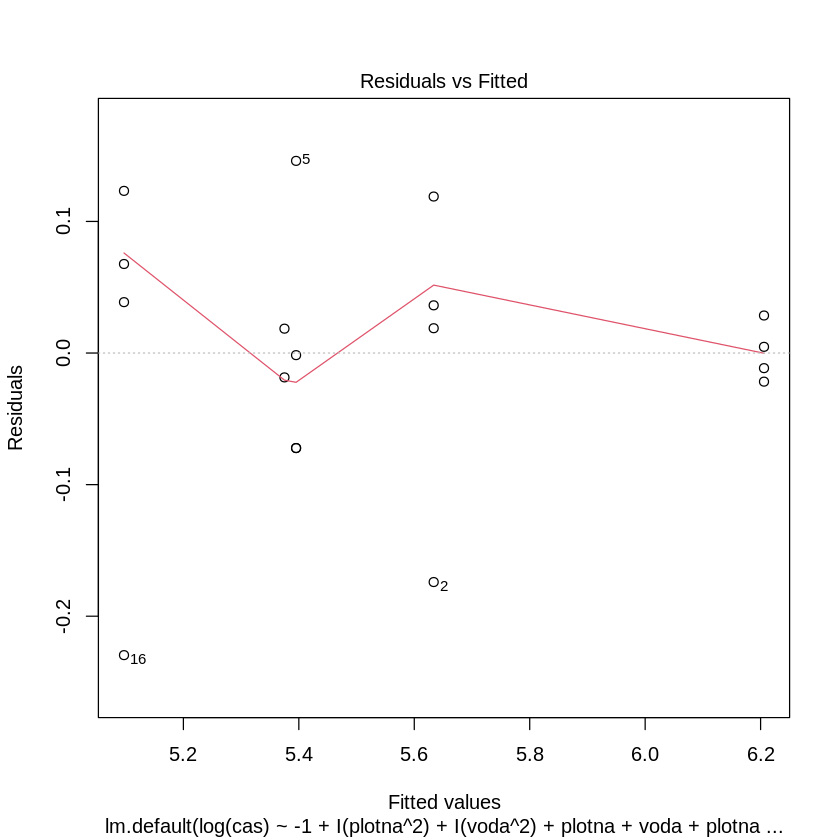

In [44]:
plot(modelnum3,which=1)

In [32]:
anova(modelnum2,modelnum3)

Warning message in anova.lmlist(object, ...):
“models with response ‘"log(cas)"’ removed because response differs from model 1”


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
plotna,1,1220615.48,1220615.4751,1329.8251,4.618493e-16
voda,1,294475.93,294475.9302,320.8230,1.549719e-11
plotna:voda,1,175813.44,175813.4443,191.5436,6.013793e-10
Residuals,15,13768.15,917.8767,NA,NA


Model *modelnum3* nejlépe popisuje naměřená data. Logaritmická transformace vysvětlované proměnné velmi snižuje rozptyl reziduí. Kvadratická transformace proměnných plotna a voda také výrazně zlepšuje model. 

Vybral jsem tento model, i přesto, že *modelnum2*, který je bez transformací, popisuje data přibližně stejně jako *modelnum3*, je jasné, že čas ohřevu vody nezávisí lineárně na plotně a vodě. Výkon plotny přímo závisí na její velikosti, tedy obsahu. Voda se neohřívá rovnoměrně a stacionárně, čím více vody, tím větší hloubka.

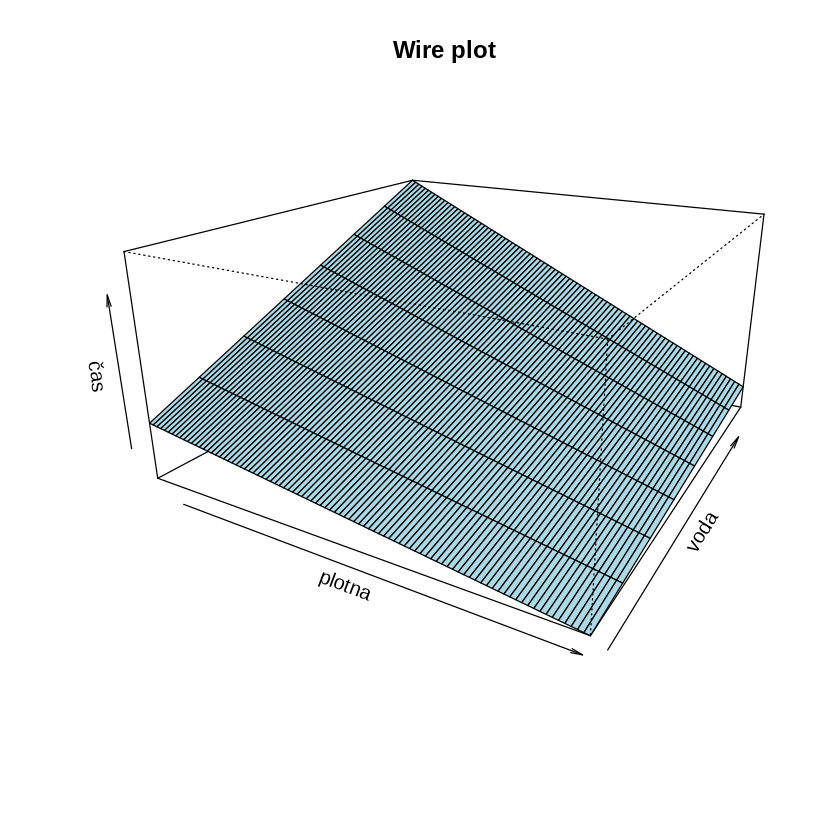

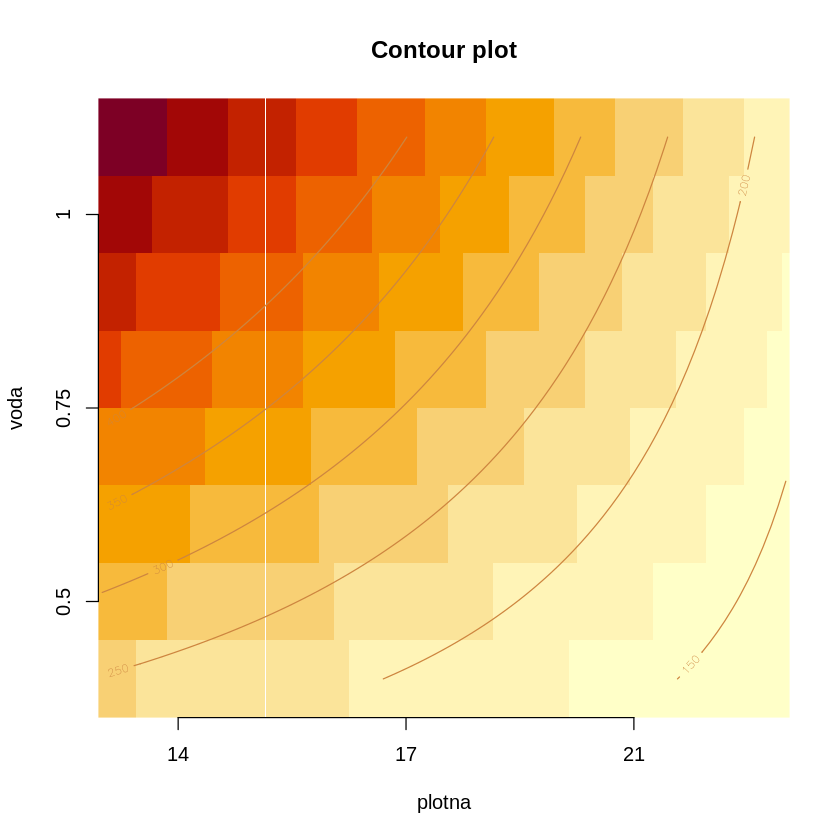

In [55]:
x=seq(13,22,by=0.1)
y=seq(0.4,1.1,by=0.1)

f = function(x,y){
    new.x=data.frame(x1=x,x2=y,x3=x*y)
    colnames(new.x) <- c("plotna", "voda","plotna:voda")

    predict(modelnum2, new.x)
}

z = outer(x,y,f)
persp(x,y,z,theta=30,phi=20,expand=0.5,col="lightblue", xlab="plotna",ylab="voda",zlab="čas")
title(main = "Wire plot")

image(x,y,z,axes=F,xlab="plotna",ylab="voda")

contour(x,y,z,levels=seq(0,400,by=50),add=T,col="peru")
axis(1,at=seq(14,21,by=3),labels=c(14,17,21))
axis(2,at=seq(0.5,1,by=0.25),labels=c(0.5,0.75,1))
title(main = "Contour plot")


# Závěr

V tomto protokolu jsem testoval závislost doby varu vody na 5 faktorech: množství vody, obsah soli, použití pokličky, velikost varné desky, velikost hrnce. Z důvodu úspornosti experimentu jsem zvolil design $2^{5-1}$.

Z grafické analýzy vyplývá, že významnými faktory pro dobu ohřevu vody jsou množství vody a velikost plotny. Interakční plot ukázal interakci mezi vodou a plotnou. To samé ukazuje DanielPlot významnost plotny, vody a jejich interakce.

Po naměření center pointů regresní model ukázala nelinearitu regresních parametrů. Jako vhodné transformace se ukázaly: logaritmus vysvětlované proměnné a kvadratická závislost vysvětlujících proměnných plotny a vody.

Nakonec wire a contour ploty ukázaly, že čím více vody tím delší čas ohřevu vody a čím menší plota tím kratší doba ohřevu vody.